In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [37]:
U0=np.zeros([300])
fint=100*np.sin(np.pi*(np.linspace(50, 110, 60)-50)/60.)
U0[50:110]=fint

In [49]:
a=300.
tmax=0.45
tmin=0.
dx=5.
dt=0.015
xmax=300.

def FTFS(a, tmax, dx, dt, xmax, InitCond):
    Nt=int(tmax/dt)
    Nl=int(xmax/dx)
    xcoords=np.linspace(0, xmax, Nl)
    U=np.copy(InitCond)
    for i in range(Nt):
        siguiente=U-a*(dt/dx) * (np.roll(U, -1) - U)
        U=siguiente
        U[0]=0
        U[-1]=0
    return U

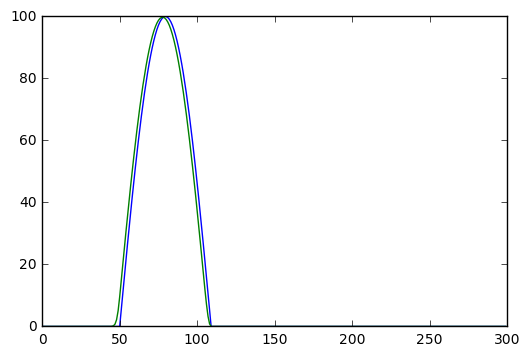

In [60]:
plt.plot(U0)
plt.plot(FTFS(-20, tmax, dx, dt, xmax, U0))

In [58]:
def FTCS(a, tmax, dx, dt, xmax, InitCond):
    Nt=int(tmax/dt)
    Nl=int(xmax/dx)
    xcoords=np.linspace(0, xmax, Nl)
    U=np.copy(InitCond)
    for i in range(Nt):
        siguiente=U-a*(dt/(2*dx)) * (np.roll(U, -1) - np.roll(U, 1))
        U=siguiente
        U[0]=0
        U[-1]=0
    return U

0.9


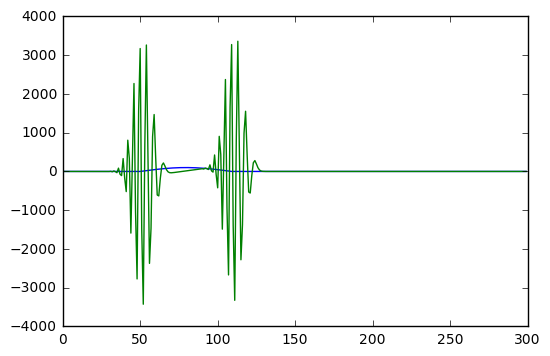

In [66]:
plt.plot(U0)
plt.plot(FTCS(300, tmax, dx, dt, xmax, U0))
print a*dt/dx

In [84]:
U0=np.ones([80])
U0[len(U0)/2:]*=0
print U0

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]


In [99]:
def LAX(tmax, dx, dt, xmax, InitCond):
    Nt=int(tmax/dt)
    Nl=int(xmax/dx)
    xcoords=np.linspace(0, xmax, Nl)
    U=np.copy(InitCond)
    F=U**2/2
    for i in range(Nt):
        siguiente=0.5*(np.roll(U, -1) + np.roll(U,1))-(dt/(2*dx))*(np.roll(F, -1)-np.roll(F, 1))
        U=siguiente
        U[:len(U0)/2]=1
        F=0.5*U**2
    return U

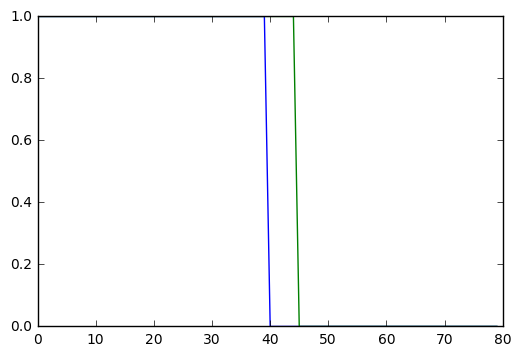

In [101]:
plt.plot(U0)
plt.plot(LAX(0.5, 0.05, 2*0.05, 4, U0))
